In [1]:
import os
import numpy as np
import pandas as pd
import sys
import time
import multiprocessing
from functools import partial
from tqdm.notebook import tqdm, trange
import rdkit 
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Virtuous Library
sys.path.append('../scripts/')
import Virtuous
print (Virtuous.__version__)

1.7


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 20)

### Setting folders

In [4]:
data_path = "../data/"

### Import DB checked with Rdkit

In [5]:
# set the original file 
original_file = data_path + "1-All_DBs_CHECKED.csv"

In [6]:
DB = pd.read_csv (original_file , sep = ";")
DB

,id,Name,SMILE,Taste,Reference,Note
0,0,ACHILLIN,C[C@H]1C(=O)O[C@...,Bitter,Biochemical Targ...,none
1,1,Acteoside,OC[C@H]1O[C@@H](...,Bitter,Biochemical Targ...,none
2,2,Aloenin,OC[C@H]1O[C@@H](...,Bitter,Biochemical Targ...,none
3,3,BIS(ACETIC ACID)...,O=C(c1cc(O)c(c(c...,Bitter,Biochemical Targ...,none
4,4,BRUCEIN B,COC(=O)[C@@]12OC...,Bitter,Biochemical Targ...,none
...,...,...,...,...,...,...
3396,3397,NaN,C=CC(c1cc2cc3C[C...,Non-bitter,Wiener et al. (2...,none
3397,3398,NaN,COc1cc(/C=C/C(=O...,Non-bitter,Wiener et al. (2...,none
3398,3399,NaN,O=C(Nc1ccccc1C(=...,Non-bitter,Wiener et al. (2...,none
3399,3400,NaN,O=C(Nc1ccc(cc1)C...,Non-bitter,Wiener et al. (2...,none


### Doing some statics on the data

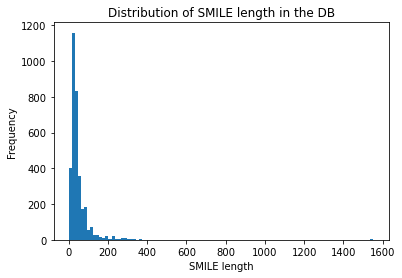

There are 3 compunds longer than 400 chaacters: [2258, 2360, 2545]


In [7]:
import matplotlib.pyplot as plt
lengths = []
long_smiles = []
max_len=400

for i in range(len(DB)): 
    lengths.append(len(DB.SMILE.iloc[i]))
    if len(DB.SMILE.iloc[i]) > max_len: 
        long_smiles.append(i)
    
fig = plt.hist(np.sort(np.array(lengths)), bins=100)
plt.xlabel("SMILE length")
plt.ylabel("Frequency")
plt.title("Distribution of SMILE length in the DB")
plt.show()

print ("There are %d compunds longer than %d chaacters: %s" %(len(long_smiles), max_len, long_smiles) )

## Import DB: remove compounds longer than 400 characters, remove duplicates, standardize and remove issues

In [8]:
DB_clean = Virtuous.Import_DB(original_file, output=data_path + "2-All_DBs_CLEAN.csv", smile_field="SMILE", sep = ";", max_len=400,  standardize=True, remove_duplicates=True, remove_issues=True)

Checking Molecules... 


  0%|          | 0/3401 [00:00<?, ?it/s]

OK: Check results in no errors!
Standardizing molecules using the ChEMBL Structure Pipeline ... 


  0%|          | 0/3401 [00:00<?, ?it/s]

Removing 3 molecules with SMILES longer than 400 characters 
Removing 5 molecules with issue scores from Checker higher than 5 ...
Removing 48 duplicates ... 
All Done!


In [9]:
DB_clean

,id,Name,SMILE,Taste,Reference,Note,SMILES_check,Std_SMILES,Parent_SMILES
0,0,ACHILLIN,C[C@H]1C(=O)O[C@...,Bitter,Biochemical Targ...,none,CC1=CC(=O)C2=C(C...,CC1=CC(=O)C2=C(C...,CC1=CC(=O)C2=C(C...
1,1,Acteoside,OC[C@H]1O[C@@H](...,Bitter,Biochemical Targ...,none,C[C@@H]1O[C@@H](...,C[C@@H]1O[C@@H](...,C[C@@H]1O[C@@H](...
2,2,Aloenin,OC[C@H]1O[C@@H](...,Bitter,Biochemical Targ...,none,COc1cc(-c2c(C)cc...,COc1cc(=O)oc(-c2...,COc1cc(=O)oc(-c2...
3,3,BIS(ACETIC ACID)...,O=C(c1cc(O)c(c(c...,Bitter,Biochemical Targ...,none,CC(=O)O.CC(=O)O....,CC(=O)O.CC(=O)O....,O=C(OCC1OC(OC(=O...
4,4,BRUCEIN B,COC(=O)[C@@]12OC...,Bitter,Biochemical Targ...,none,COC(=O)[C@@]12OC...,COC(=O)[C@@]12OC...,COC(=O)[C@@]12OC...
...,...,...,...,...,...,...,...,...,...
2930,3397,NaN,C=CC(c1cc2cc3C[C...,Non-bitter,Wiener et al. (2...,none,C=CC(C)(C)c1cc2c...,C=CC(C)(C)c1cc2c...,C=CC(C)(C)c1cc2c...
2931,3398,NaN,COc1cc(/C=C/C(=O...,Non-bitter,Wiener et al. (2...,none,COc1cc(/C=C/C(=O...,COc1cc(/C=C/C(=O...,COc1cc(/C=C/C(=O...
2932,3399,NaN,O=C(Nc1ccccc1C(=...,Non-bitter,Wiener et al. (2...,none,O=C(/C=C/c1ccccc...,O=C(/C=C/c1ccccc...,O=C(/C=C/c1ccccc...
2933,3400,NaN,O=C(Nc1ccc(cc1)C...,Non-bitter,Wiener et al. (2...,none,O=C(/C=C/c1cccc(...,O=C(/C=C/c1cccc(...,O=C(/C=C/c1cccc(...


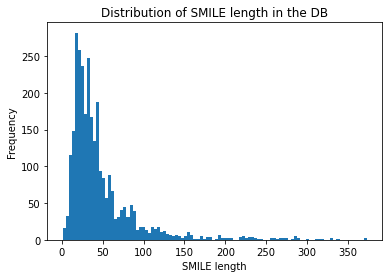

There are 0 compunds longer than 400 chaacters: []


In [10]:
import matplotlib.pyplot as plt
lengths = []
long_smiles = []
max_len=400

for i in range(len(DB_clean)): 
    lengths.append(len(DB_clean.SMILE.iloc[i]))
    if len(DB_clean.SMILE.iloc[i]) > max_len: 
        long_smiles.append(i)
    
fig = plt.hist(np.sort(np.array(lengths)), bins=100)
plt.xlabel("SMILE length")
plt.ylabel("Frequency")
plt.title("Distribution of SMILE length in the DB")
plt.show()

print ("There are %d compunds longer than %d chaacters: %s" %(len(long_smiles), max_len, long_smiles) )

## Calculating descriptors (Mordred + Rdkit + pybel) using the Parent smiles

In [12]:
DB_desc = Virtuous.CalcDesc_DB (DB_clean, output= data_path + "Mordred_RDKit_pybel.csv", smile_field = "Parent_SMILES", sep = ";", Mordred=True, RDKit=True, pybel=True) 

  0%|          | 0/2935 [00:00<?, ?it/s]